In [158]:
# Load libraries
import pandas as pd

In [161]:
# Load dataframe into environment
#IMDb_dataframe = pd.read_csv('/work/NLP/NLP_IMDb_Exam/Data/review_dataframe.csv')
IMDb_dataframe[IMDb_dataframe['movie_title'] == "2001_ A Space Odyssey"]

,movie_title,year,rating,title,review,average_rating
9064,2001_ A Space Odyssey,1968,10,Legendary\n,"A stand-alone monument in cinema history, Stan...",NaN
9065,2001_ A Space Odyssey,1968,10,Unmatched accomplishment\n,Sometimes reading the user comments on IMDB fi...,NaN
9066,2001_ A Space Odyssey,1968,10,"My god, it's full of stars\n",For all those bewildered by the length and pac...,NaN
9067,2001_ A Space Odyssey,1968,7,Ahead of its time but...\n,I felt the need to review this movie after rea...,NaN
9068,2001_ A Space Odyssey,1968,10,A film of monolithic proportions.\n,A review I have put off for far too long....<b...,NaN
...,...,...,...,...,...,...
11162,2001_ A Space Odyssey,1968,10,one of the best movies - ever\n,i saw the movie for the first time last tuesda...,NaN
11163,2001_ A Space Odyssey,1968,Null,quite beautiful for it's time\n,In 1968 I would have been enthralled by the vi...,NaN
11164,2001_ A Space Odyssey,1968,Null,Dynamic!\n,I truly appreciate this film for its lack of d...,NaN
11165,2001_ A Space Odyssey,1968,8,A visually stunning film.\n,Kubrick was one the greatest directors the 20t...,NaN


In [157]:
print(f"Total amount of 'Null'-ratings: {sum(IMDb_dataframe['rating']=="Null")}")
IMDb_dataframe = IMDb_dataframe[IMDb_dataframe['rating'] != "Null"]

IMDb_dataframe[IMDb_dataframe['average_rating'] != "NaN"]


IMDb_dataframe.iloc[8500]

Total amount of 'Null'-ratings: 0


movie_title                                   2001_ A Space Odyssey
year                                                           1968
rating                                                            5
title             Visually stunning but not as deep as it preten...
review            I bet that Stanley Kubrick spent the last thir...
average_rating                                                  NaN
Name: 9098, dtype: object

In [156]:
IMDb_dataframe['average_rating'].iloc[8450:8500]

9040    5.8
9042    5.8
9043    5.8
9044    5.8
9045    5.8
9046    5.8
9047    5.8
9048    5.8
9049    5.8
9051    5.8
9052    5.8
9053    5.8
9054    5.8
9055    5.8
9056    5.8
9060    5.8
9061    5.8
9063    5.8
9064    NaN
9065    NaN
9066    NaN
9067    NaN
9068    NaN
9069    NaN
9070    NaN
9072    NaN
9073    NaN
9074    NaN
9075    NaN
9076    NaN
9077    NaN
9078    NaN
9079    NaN
9081    NaN
9082    NaN
9083    NaN
9084    NaN
9085    NaN
9086    NaN
9087    NaN
9088    NaN
9089    NaN
9090    NaN
9091    NaN
9092    NaN
9093    NaN
9094    NaN
9095    NaN
9096    NaN
9097    NaN
Name: average_rating, dtype: float64

In [113]:
# Find a way to plot distributions of average_rating and infered rating. Also plot difference.
Movie_name = "Zulu"
IMDb_dataframe["rating"] = pd.to_numeric(IMDb_dataframe["rating"], errors="coerce")
Movie_rating = IMDb_dataframe[IMDb_dataframe['movie_title'] == Movie_name]["rating"]
Movie_rating = IMDb_dataframe[IMDb_dataframe['movie_title'] == Movie_name]["rating"]
Movie_rating_online = IMDb_dataframe[IMDb_dataframe['movie_title'] == Movie_name]["average_rating"]
mean_rating = Movie_rating.mean()
print(f"mean rating from reviews {mean_rating}, vs average imdb rating {float(Movie_rating_online.iloc[1])}")


mean rating from reviews 8.555, vs average imdb rating 7.7


In [114]:
#!pip install torch "transformers[torch]" datasets evaluate seqeval

In [115]:
import numpy as np
import pandas as pd
import torch
import datasets
import evaluate
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForTokenClassification, AutoModel
from transformers import TrainingArguments, Trainer
from transformers import DataCollatorForTokenClassification

424179    7.7
243438    7.3
830002    8.1
264940    7.4
879700    5.2
         ... 
269809    7.4
884113    7.0
624523    NaN
805099    8.5
122154    7.3
Name: average_rating, Length: 10000, dtype: float64

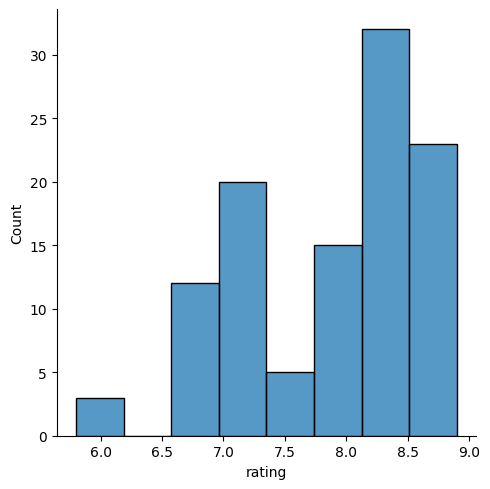

In [116]:
from sentence_transformers import SentenceTransformer
import seaborn as sns
bertmodel = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2') # Choose the sentence transformer, most popular used

# Subset of data for testing implementation:
IMDb_subset = IMDb_dataframe.sample(n=10000, random_state=76)


reviews_embedding = bertmodel.encode(IMDb_subset["review"].tolist()) #Embed the reviews in embedding space
emb = pd.DataFrame(reviews_embedding) # Pandas dataframe of embeddings

emb['rating'] = pd.to_numeric(IMDb_subset['average_rating'], errors='coerce')
sns.displot(emb['rating'], )
pd.to_numeric(IMDb_subset['average_rating'], errors='coerce')


In [35]:
from datasets import Dataset
# Create a DataFrame
df = pd.DataFrame({'text': IMDb_dataframe['review'], 'rating': IMDb_dataframe["average_rating"]})
# Convert the DataFrame to Hugging Face Dataset
dataset = Dataset.from_pandas(df)

# Define Tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenize the text in the dataset
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)

# Apply the tokenizer
dataset = dataset.map(tokenize_function, batched=True)

# Now you have a dataset in a transformer-friendly format
# You can split it into training and validation sets
train_test_split = dataset.train_test_split(test_size=0.2)
train_dataset = train_test_split['train']
test_dataset = train_test_split['test']

# Check the resulting format
print(train_dataset)

Map: 100%|██████████| 835602/835602 [05:08<00:00, 2708.77 examples/s]


Dataset({
    features: ['text', 'rating', '__index_level_0__', 'input_ids', 'attention_mask'],
    num_rows: 668481
})


In [ ]:
from transformers import Trainer, TrainingArguments, AutoModelForSequenceClassification
from datasets import load_dataset

# Define variables
df = pd.DataFrame({'text': IMDb_dataframe['review'], 'rating': IMDb_dataframe["average_rating"]})
# Convert the DataFrame to Hugging Face Dataset
dataset_small = Dataset.from_pandas(df.head(100))

dataset_small

# Define Tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Define model
model = AutoModelForSequenceClassification.from_pretrained('your_model_name')

# Set training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    num_train_epochs=3,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset['train'],
    eval_dataset=dataset['test'],
)

# Train the model
trainer.train()


Dataset({
    features: ['text', 'rating', '__index_level_0__'],
    num_rows: 100
})